# First check of Data Types for records

1) Check data types and maximum lengths

2) Check statistics of data

In [1]:
import pandas as pd
import numpy as np

In [62]:
data = pd.read_csv("C:/Users/roydo/OneDrive/Year 3 Sem 1/Database/Project/data.tsv", sep='\t')
data.head()

,tconst,averageRating,numVotes
0,tt0000001,5.6,1645
1,tt0000002,6.1,198
2,tt0000003,6.5,1342
3,tt0000004,6.2,120
4,tt0000005,6.2,2127


In [87]:
data.dtypes

tconst            object
averageRating    float64
numVotes           int64
dtype: object

In [11]:
# Max of each column
data.describe()

,averageRating,numVotes
count,1.070318e+06,1.070318e+06
mean,6.884317e+00,9.588359e+02
std,1.396673e+00,1.592951e+04
min,1.000000e+00,5.000000e+00
25%,6.100000e+00,9.000000e+00
50%,7.100000e+00,2.000000e+01
75%,7.800000e+00,7.800000e+01
max,1.000000e+01,2.279223e+06


In [15]:
print("Max of tconst:", max(data["tconst"]))
print("Max of averageRating:",max(data["averageRating"]))
print("Max of numVotes:",max(data["numVotes"]))

Max of tconst: tt9916778
Max of averageRating: 10.0
Max of numVotes: 2279223


In [21]:
# Check Frequency of numVotes (Search key)
frequencyVotes = data["numVotes"].value_counts()
print("Maximum frequency: ", max(frequencyVotes))

Maximum frequency:  81495


In [29]:
len(data)

1070318

In [28]:
# Observe skewness of data (High skewness since > 1)
frequencyVotes.skew()

44.74064844984084

Text(0.5, 1.0, 'Frequency of votes against number of votes. The max votes: 81495')

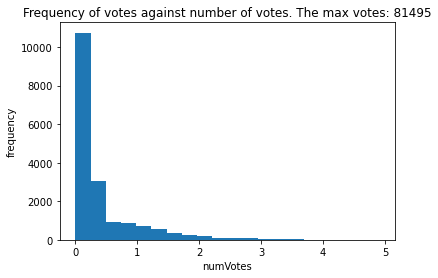

In [26]:
# Since data is skewed we logged the data to better observe distribution
ax = np.log10(frequencyVotes).plot.hist(bins=20)
ax.set_xlabel("numVotes")
ax.set_ylabel("frequency")
ax.set_title("Frequency of votes against number of votes. The max votes: " + str(max_votes))

# B Plus tree checking

In [3]:
# Check distinct values in numVotes
len(data["numVotes"].unique())

18072

In [4]:
uniqueData = data["numVotes"].unique()

In [5]:
uniqueData.sort()

In [6]:
uniqueData

array([      5,       6,       7, ..., 2003263, 2242051, 2279223],
      dtype=int64)

In [10]:
new_data = data[:10000]

In [13]:
new_data[new_data["numVotes"] == 5]

,tconst,averageRating,numVotes
168,tt0000171,5.0,5
173,tt0000176,5.8,5
183,tt0000188,5.0,5
190,tt0000199,5.0,5
194,tt0000207,6.4,5
...,...,...,...
9506,tt0025247,7.0,5
9556,tt0025319,5.2,5
9729,tt0025548,7.8,5
9772,tt0025613,5.8,5


In [27]:
# Checking the insert
new_data.sort_values(by = "numVotes")

,tconst,averageRating,numVotes
1395,tt0003815,7.4,5
5796,tt0019594,6.6,5
3771,tt0014239,6.0,5
5777,tt0019549,5.8,5
1233,tt0002950,6.0,5
...,...,...,...
4285,tt0015864,8.2,97507
3266,tt0012349,8.3,109070
7281,tt0022100,8.3,139298
4788,tt0017136,8.3,156098


In [40]:
newUniqueData = new_data.drop_duplicates(subset = "numVotes")

In [43]:
newUniqueData.sort_values(by = "numVotes").head(50)

,tconst,averageRating,numVotes
168,tt0000171,5.0,5
160,tt0000163,4.5,6
142,tt0000145,3.9,7
123,tt0000125,5.0,8
51,tt0000053,2.8,9
188,tt0000197,4.7,10
139,tt0000142,5.0,11
54,tt0000056,3.5,12
94,tt0000096,4.6,13
59,tt0000061,4.1,14


In [24]:
data

,tconst,averageRating,numVotes
0,tt0000001,5.6,1645
1,tt0000002,6.1,198
2,tt0000003,6.5,1342
3,tt0000004,6.2,120
4,tt0000005,6.2,2127
...,...,...,...
1070313,tt9916580,7.2,5
1070314,tt9916690,6.6,5
1070315,tt9916720,5.8,60
1070316,tt9916766,6.9,14


# B Plus tree search

In [88]:
numVotes500 = data[data["numVotes"] == 500]

In [89]:
numVotes500

,tconst,averageRating,numVotes
3595,tt0013674,7.0,500
9018,tt0024561,6.8,500
11826,tt0028277,7.7,500
22779,tt0041956,6.5,500
27186,tt0047361,7.3,500
...,...,...,...
1043265,tt8960572,6.0,500
1059269,tt9454484,8.7,500
1062934,tt9614612,7.7,500
1064691,tt9680914,7.1,500


In [90]:
numVotes500["averageRating"].mean()

6.731818181818184

In [17]:
data[data["numVotes"] == 20].head(55)

,tconst,averageRating,numVotes
18,tt0000019,5.3,20
75,tt0000077,5.1,20
81,tt0000083,5.0,20
85,tt0000087,5.0,20
407,tt0000644,5.3,20
421,tt0000666,5.8,20
422,tt0000668,7.0,20
658,tt0001035,5.2,20
852,tt0001519,5.3,20
929,tt0001790,6.0,20


# Bplus Tree Range Search Checking

Average of average ratings of all records: 6.1087 (100,000)records loaded

In [59]:
new = data.loc[(data['numVotes'] >= 30000) & (data['numVotes'] <= 40000)]

In [60]:
new["averageRating"].mean()

6.727911857292764

In [61]:
new.sort_values(by="numVotes")

,tconst,averageRating,numVotes
32968,tt0054167,7.7,30022
10652,tt0026778,7.9,30034
65199,tt0091828,5.6,30037
773789,tt3361792,6.8,30041
572980,tt1456941,6.2,30049
...,...,...,...
616056,tt1698641,6.2,39951
83906,tt0114287,6.9,39963
226387,tt0421729,4.7,39979
567389,tt1423995,5.4,39988


# Bplus delete

In [65]:
len(data[data["numVotes"] == 1000])

42